In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

sns.set(color_codes=True)



Importing the two data sets as csv files,
din--> data IN
dinm--> metadata IN

In [3]:
din=pd.read_csv(r"C:\Users\Shashwat Ratna\Desktop\WID\WID_data_IN.csv",sep=";",encoding="utf-8")
dinm=pd.read_csv(r"C:\Users\Shashwat Ratna\Desktop\WID\WID_metadata_IN.csv",sep=";",encoding="cp1252")

Analysis

In [4]:
dinm.head(2)


,country,variable,age,pop,countryname,shortname,simpledes,technicaldes,shorttype,longtype,shortpop,longpop,shortage,longage,unit,source,method
0,IN,acfccoi992,992,i,India,Consumption of fixed capital of corporations,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,Adults,The population is comprised of individuals ove...,INR,See [URL][URL_TEXT]DINA guidelines[/URL_TEXT][...,WID.world estimations as a proportion of GDP b...
1,IN,acfccoi999,999,i,India,Consumption of fixed capital of corporations,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,All Ages,The population is comprised of individuals of ...,INR,See [URL][URL_TEXT]DINA guidelines[/URL_TEXT][...,WID.world estimations as a proportion of GDP b...


In [5]:
din.head()

,country,variable,percentile,year,value,age,pop
0,IN,afiinc992j,p37p100,1951,33916.0,992,j
1,IN,afiinc992j,p37p100,1952,30793.1,992,j
2,IN,afiinc992j,p37p100,1953,36714.7,992,j
3,IN,afiinc992j,p37p100,1954,28677.6,992,j
4,IN,afiinc992j,p37p100,1955,35383.0,992,j


In [6]:
dinm.dtypes

country         object
variable        object
age              int64
pop             object
countryname     object
shortname       object
simpledes       object
technicaldes    object
shorttype       object
longtype        object
shortpop        object
longpop         object
shortage        object
longage         object
unit            object
source          object
method          object
dtype: object

In [7]:
din[din["variable"]=="ahweal992j"]

,country,variable,percentile,year,value,age,pop
206,IN,ahweal992j,p55p100,1961,2.445343e+05,992,j
207,IN,ahweal992j,p55p100,1971,2.808151e+05,992,j
208,IN,ahweal992j,p55p100,1981,3.936996e+05,992,j
209,IN,ahweal992j,p55p100,1991,5.467016e+05,992,j
210,IN,ahweal992j,p55p100,1995,5.385142e+05,992,j
...,...,...,...,...,...,...,...
217452,IN,ahweal992j,p99.999p100,2017,7.691136e+09,992,j
217453,IN,ahweal992j,p99.999p100,2018,8.738768e+09,992,j
217454,IN,ahweal992j,p99.999p100,2019,8.341740e+09,992,j
217455,IN,ahweal992j,p99.999p100,2020,7.244621e+09,992,j


USING ahweal992j Data now. Some points to keep in mind,
Country India
Country Code IN
Short name of variable Net personal wealth
Type(s) of variableAverage

Years 1961-2012
Age groups Aggregate on population aged over 20
Population categoriesEqual-split adults
WID.world code ahweal992j
PercentilesAll g-percentiles
Years available for these percentilesPercentiles available for all years
Simple description of variable:                                                                                                       Net personal wealth is the total value of non-financial and financial assets (housing, land, deposits, bonds, equities, etc.) held by households, minus their debts. . The personal or household sector - in the national accounts sense - includes all households and private individuals (including those living in institutions), as well as unincorporated enterprises whose accounts are not separated from those of the households who own them.
Technical description of variable[Net personal wealth]=[Personal non-financial assets]+[Personal financial assets]-[Personal debt]
Method used for computation :
In 1961 and 1971 data covers rural areas only. Net wealth is reported since 1981. In 1971, net wealth is estimated using the liabilies at the bracket level (assuming individuals remain in the same bracket). In 1961, liabilities are estimated assuming the liability/gross wealth ratios at the bracket level from 1971, and using the 1971 proportions of individuals having any kind of liability. In 2002 and 2012 series are corrected using Forbes lists, and the top of the survey distribution is replaced by a Pareto distribution.
Source                                                                                                                                     Nitin Kumar Bharti (2018), Wealth Inequality, Class and Caste in India

In [8]:
cur=din[din["variable"]=="ahweal992j"]
l=cur.percentile.unique()
#p0p50 is in l
#p9p100
print("p0p50" in l)

True


Thus we will compare Net personal wealth for the group(bottom 50th to 100th percentile) and the group(top 10th
percentile)

In [9]:
curt=cur.drop(["country","age","pop"],axis=1)
curt=curt[(curt["percentile"]=="p90p100") | (curt["percentile"]=="p0p50") ]
print(curt)

          variable percentile  year      value
37913   ahweal992j    p90p100  1961   559714.5
37914   ahweal992j    p90p100  1971   625385.0
37915   ahweal992j    p90p100  1981   924923.9
37916   ahweal992j    p90p100  1991  1400968.4
37917   ahweal992j    p90p100  1995  1476209.6
...            ...        ...   ...        ...
130147  ahweal992j      p0p50  2017   111565.0
130148  ahweal992j      p0p50  2018   113138.4
130149  ahweal992j      p0p50  2019   116439.6
130150  ahweal992j      p0p50  2020   104955.8
130151  ahweal992j      p0p50  2021   116061.3

[62 rows x 4 columns]


In [10]:
curt=curt.drop("variable",axis=1)
print(curt)


       percentile  year      value
37913     p90p100  1961   559714.5
37914     p90p100  1971   625385.0
37915     p90p100  1981   924923.9
37916     p90p100  1991  1400968.4
37917     p90p100  1995  1476209.6
...           ...   ...        ...
130147      p0p50  2017   111565.0
130148      p0p50  2018   113138.4
130149      p0p50  2019   116439.6
130150      p0p50  2020   104955.8
130151      p0p50  2021   116061.3

[62 rows x 3 columns]


In [11]:
curt=curt.pivot_table(values="value",columns="percentile",index="year")
print(curt)

percentile     p0p50    p90p100
year                           
1961         31859.1   559714.5
1971         34794.4   625385.0
1981         44853.9   924923.9
1991         48700.3  1400968.4
1995         45493.1  1476209.6
1996         48399.8  1567005.6
1997         51468.2  1677240.7
1998         52617.5  1721043.0
1999         54986.5  1805868.5
2000         58859.6  1939729.2
2001         59735.6  1995971.1
2002         61073.9  2082882.1
2003         64379.2  2128271.9
2004         69965.3  2265363.5
2005         75611.1  2411855.0
2006         81633.7  2610602.2
2007         84140.3  2904003.9
2008         86602.3  3313140.7
2009         87582.6  3351172.0
2010         84762.4  3763841.7
2011         85007.8  4223870.1
2012         91046.6  4469097.7
2013         92669.0  4633918.6
2014         94903.6  5048418.6
2015        100515.4  5372108.5
2016        106756.5  5676270.8
2017        111565.0  5918204.2
2018        113138.4  6098022.1
2019        116439.6  6213251.6
2020    

Below picture shows the glaring inequality with respect to net personal wealth

C:\Users\Shashwat Ratna\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shashwat Ratna\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


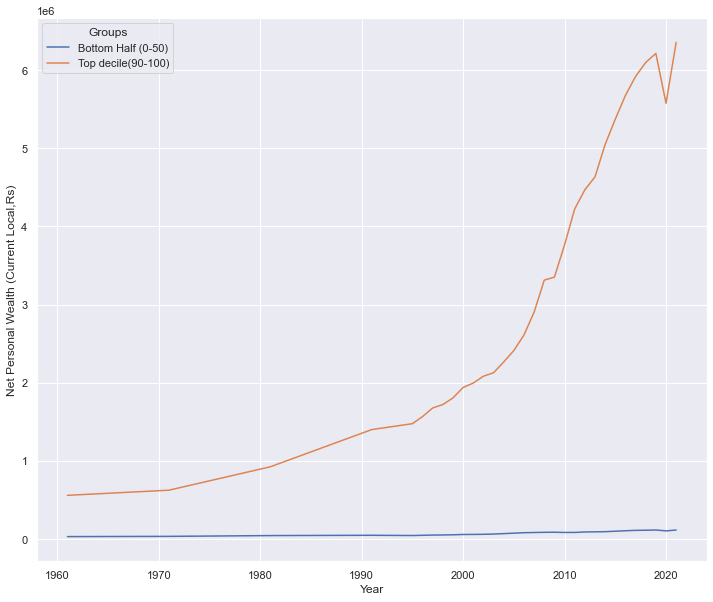

In [29]:
sns.lineplot("year","p0p50",data=curt);
sns.lineplot("year","p90p100",data=curt);
plt.tight_layout;
plt.legend(title="Groups",labels=["Bottom Half (0-50)","Top decile(90-100)"]);
plt.ylabel("Net Personal Wealth (Current Local,Rs)");
plt.xlabel("Year");
fig=plt.gcf();
fig.set_size_inches(12,10);


C:\Users\Shashwat Ratna\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


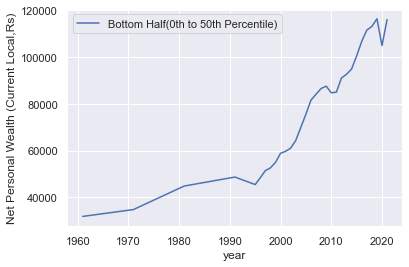

In [36]:
sns.lineplot("year","p0p50",data=curt);
plt.ylabel("Net Personal Wealth (Current Local,Rs)")
plt.legend(labels=["Bottom Half(0th to 50th Percentile)"])